In [50]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## regression model
this is a function that returns the y points of the model

In [51]:
def regression_model(w,b,x_set):
    m = x_set.shape[0]
    f_wb = np.zeros(m)
    # for i in range(m):
    #     f_wb[i] = w*x_set[i]+b
    f_wb = w * x_set + b
    return f_wb

## Cost value
this will calculate the value of a certain model for a given b and w


In [52]:
def cost_function(w,b,x_set,y_set):
    m = y_set.shape[0]
    f_wb = regression_model(w,b,x_set)
    #cost = 0
    cost = np.sum((f_wb - y_set)**2)
    # for i in range(m):
    #     cost += ((f_wb - y_set[i])**2)
    return cost/2*m

## defining partial derivatives of the J(w,b) function

### this is the J(w,b) function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

### this is the partial derivative
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [53]:
def partial_derivative(x_set,y_set,w,b):
    """"
    Args:
        x_set (ndarray (m,)): the training set that corresponds to features
        y_set (ndarray (m,)): the training set that corresponds to targets
    Returns:
        dj_dw (scalar): the value of slope when deriving with respect to weight
        dj_db (scalar): the value of slope when deriving with respect to bias
    """
    m = x_set.shape[0]
    predictions = w * x_set + b
    errors = predictions - y_set
    dj_dw = np.dot(errors, x_set) / m  # Vectorized calculation of dj_dw
    dj_db = np.sum(errors) / m         # Vectorized calculation of dj_db
    return dj_dw, dj_db

### this is the gradient descent algo
$$
\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}
$$

In [54]:
def gradient_descent(init_w,init_b,alpha,times,x_training,y_training):
    """
    Args:
        init_w (int): the initial weights
        init_b (int): the initial bias
        alpha (float): the learning rate
        times (int): the number of iterations
        x_training (ndarray (m,)): the training set that corresponds to features
        y_training (ndarray (m,)): the training set that corresponds to targets
    Returns:
        w (int): the optimal weight
        b (int): the optimal bias
    """
    w = init_w
    b = init_b
    for i in range(times):
        dj_dw, dj_db = partial_derivative(x_training,y_training,w,b)
        if abs(alpha * dj_dw) < 1e-15 and abs(alpha * dj_db) < 1e-15:
            print(i)
            break
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    return w,b


def gradiant_descent_algorithm(x_training:np.ndarray,y_training:np.ndarray):
    
    """
    Args:
        x_training (ndarray (m,)): the training set that corresponds to features
        y_training (ndarray (m,)): the training set that corresponds to targets
    Returns:
        w (int): the optimal weight
        b (int): the optimal bias
    """
    init_w = 10000
    init_b = 10000
    times = 1000000
    alpha = 0.01
    return gradient_descent(init_w,init_b,alpha,times,x_training,y_training)
    

## generator
this code will generate training set for the model


In [55]:
def generate_linear_data(num_points, noise_level=0.0):
    """
    Generates a single dataset of linearly fittable data with random true weight and bias.

    Args:
        num_points (int): Number of data points to generate.
        noise_level (float): The standard deviation of random noise added to the outputs.

    Returns:
        x_training (ndarray): Array of feature values.
        y_training (ndarray): Array of target values.
    """
    # Generate random x values in the range [0, 10)
    x_training = np.random.uniform(0, 10, size=num_points)
    # Randomly generate true w and b
    w_true = np.random.uniform(-10, 10)  # Random slope
    b_true = np.random.uniform(-5, 5)   # Random intercept
    # Generate y values based on the true w and b, with optional noise
    noise = np.random.normal(0, noise_level, size=num_points)
    y_training = w_true * x_training + b_true + noise
    return x_training, y_training


## plotting
defining some sets for the value and graphing the model for an optimal b and w


14374
w: 8.665583650738894  and b:  -2.678760994148826


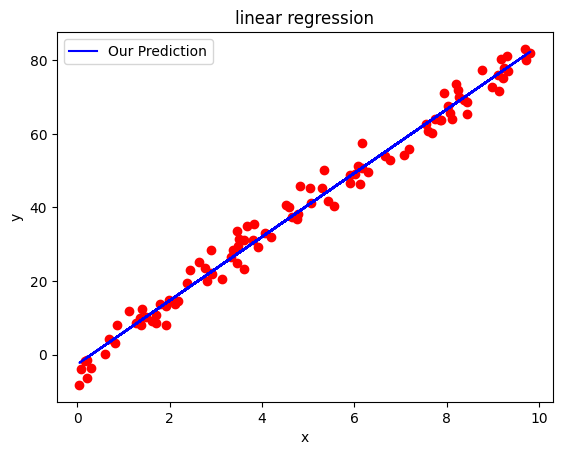

In [56]:
#setting data

x_training,y_training = generate_linear_data(100,3)
#print(x_training,y_training)
#x_training = np.array([1, 2, 3, 4, 5])
#y_training = np.array([2.2, 4.4, 6.6, 8.8, 11.0])  # Line: y = 2x + 0.2
w,b = gradiant_descent_algorithm(x_training,y_training)
print("w:",w ," and b: ",b)

y_hat = regression_model(w,b,x_training)

#adding names
plt.title("linear regression")
plt.ylabel("y")
plt.xlabel("x")

#graphing

#the regression model
plt.plot(x_training, y_hat, c='b',label='Our Prediction')

#scattering the points
plt.scatter(x_training, y_training,c="r",marker = 'o')


plt.legend()
plt.show()